### Class 7- Starter code


In [1]:
%matplotlib inline
from os.path import join
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
y = np.arange(5)
print (y)
y_hat = y
metrics.mean_squared_error(y, y_hat)

[0 1 2 3 4]


0.0

In [4]:
y_hat = y[::-1]
print (y_hat)
metrics.mean_squared_error(y, y_hat)

[4 3 2 1 0]


8.0

### Create sample data and fit a model

In [10]:
df = pd.DataFrame({'x': range(100), 'y': range(100)})
biased_df  = df.copy()
#making it biased by having 1 repeat 20 times in a 100-limit dataset
#RANDOM DATASET is defined as any random number as likely to occur as any other; thus, the probability for each random number should be equal
biased_df.loc[:20, 'x'] = 1
biased_df.loc[:20, 'y'] = 1

def append_jitter(series):
    jitter = np.random.random_sample(size=100)
    return series + jitter

df['x'] = append_jitter(df.x)
df['y'] = append_jitter(df.y)

biased_df['x'] = append_jitter(biased_df.x)
biased_df['y'] = append_jitter(biased_df.y)

In [11]:
biased_df.head()

,x,y
0,1.206773,1.098648
1,1.028623,1.246989
2,1.577640,1.281077
3,1.472138,1.535003
4,1.662454,1.547072


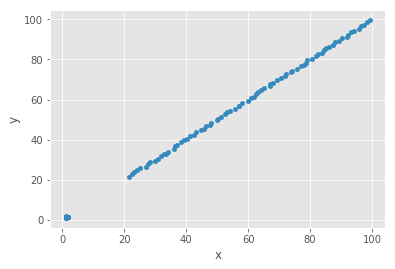

In [12]:
biased_df.plot.scatter(x='x', y='y');

In [13]:
# Fit:
lm = linear_model.LinearRegression().fit(df[['x']], df['y'])
metrics.mean_squared_error(df['y'], lm.predict(df[['x']]))

0.14677808683142388

In [14]:
## biased fit
lm = linear_model.LinearRegression().fit(biased_df[['x']], biased_df['y'])
metrics.mean_squared_error(df['y'], lm.predict(df[['x']]))

0.14949904094960778

## Cross validation
#### Intro to cross validation with bike share data from last time. We will be modeling casual ridership. 

In [15]:
from sklearn import cross_validation
bikeshare = pd.read_csv(join('..', 'data', 'bikeshare.csv'))

C:\Users\Richard\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Create dummy variables and set outcome (dependent) variable

In [36]:
weather = pd.get_dummies(bikeshare.weathersit, prefix='weather')
modeldata = bikeshare[['temp', 'hum']].join(weather[['weather_1', 'weather_2', 'weather_3']])
y = bikeshare.casual 
modeldata.head()

,temp,hum,weather_1,weather_2,weather_3
0,0.24,0.81,1,0,0
1,0.22,0.80,1,0,0
2,0.22,0.80,1,0,0
3,0.24,0.75,1,0,0
4,0.24,0.75,1,0,0


#### Create a cross valiation with 5 folds

In [24]:
modeldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 5 columns):
temp         17379 non-null float64
hum          17379 non-null float64
weather_1    17379 non-null uint8
weather_2    17379 non-null uint8
weather_3    17379 non-null uint8
dtypes: float64(2), uint8(3)
memory usage: 322.5 KB


In [33]:
scores = []
kf = cross_validation.KFold(len(modeldata), n_folds=5, shuffle=False)
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
    scores.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
    
print(np.mean(scores))
scores

1780.97924083


[931.99839389766669,
 1867.7693113242706,
 615.67122777981024,
 3264.0829849942038,
 2225.3742861695773]

Mean of MSE for 2 folds: 1856.09562181
Mean of MSE for 4 folds: 1742.21496325
Mean of MSE for 6 folds: 1762.15716018
Mean of MSE for 8 folds: 1742.80486598
Mean of MSE for 10 folds: 1743.91733572
Mean of MSE for 12 folds: 1730.10025245
Mean of MSE for 14 folds: 1717.41983777
Mean of MSE for 16 folds: 1718.91682842
Mean of MSE for 18 folds: 1713.17906482
Mean of MSE for 20 folds: 1712.25766779
Mean of MSE for 22 folds: 1711.19153497
Mean of MSE for 24 folds: 1705.82573513
Mean of MSE for 26 folds: 1705.91243242
Mean of MSE for 28 folds: 1701.68158412
Mean of MSE for 30 folds: 1704.7671545
Mean of MSE for 32 folds: 1700.56076113
Mean of MSE for 34 folds: 1698.99574904
Mean of MSE for 36 folds: 1696.57330575
Mean of MSE for 38 folds: 1695.77715767
Mean of MSE for 40 folds: 1697.59225511
Mean of MSE for 42 folds: 1696.63702912
Mean of MSE for 44 folds: 1694.79045566
Mean of MSE for 46 folds: 1693.87478207
Mean of MSE for 48 folds: 1693.88438833
Mean of MSE for 50 folds: 1694.17658893


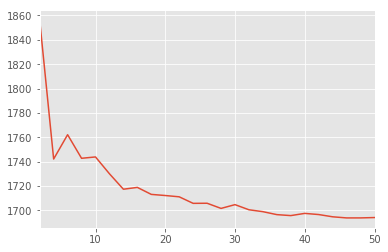

In [31]:
mse_avg = {}
for n_folds in range(2, 51, 2):
    mse_values = []
    scores = []
    n= 0

    scores = []
    kf = cross_validation.KFold(len(modeldata), n_folds=n_folds, shuffle=False)
    for train_index, test_index in kf:
        lm = linear_model.LinearRegression().fit(
            modeldata.iloc[train_index], y.iloc[train_index])
        mse_values.append(metrics.mean_squared_error(
            y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
        scores.append(lm.score(modeldata, y))
        n+=1

        mse_avg[n_folds] = np.mean(mse_values)
    print ('Mean of MSE for {} folds:'.format(n_folds), np.mean(mse_values))

pd.Series(mse_avg).plot();

Mean of MSE for 2 folds: 1673.17059585
Mean of MSE for 4 folds: 1673.477399
Mean of MSE for 6 folds: 1673.66402729
Mean of MSE for 8 folds: 1673.65932423
Mean of MSE for 10 folds: 1673.40134101
Mean of MSE for 12 folds: 1673.37059612
Mean of MSE for 14 folds: 1673.54918891
Mean of MSE for 16 folds: 1673.89652497
Mean of MSE for 18 folds: 1673.37197621
Mean of MSE for 20 folds: 1673.45436497
Mean of MSE for 22 folds: 1673.49911205
Mean of MSE for 24 folds: 1673.53489979
Mean of MSE for 26 folds: 1673.54978438
Mean of MSE for 28 folds: 1673.61969921
Mean of MSE for 30 folds: 1673.45082006
Mean of MSE for 32 folds: 1673.48571543
Mean of MSE for 34 folds: 1673.60458759
Mean of MSE for 36 folds: 1673.67994507
Mean of MSE for 38 folds: 1673.31210572
Mean of MSE for 40 folds: 1673.45685076
Mean of MSE for 42 folds: 1673.61681319
Mean of MSE for 44 folds: 1673.59817782
Mean of MSE for 46 folds: 1673.45665406
Mean of MSE for 48 folds: 1673.43236899
Mean of MSE for 50 folds: 1673.50668795


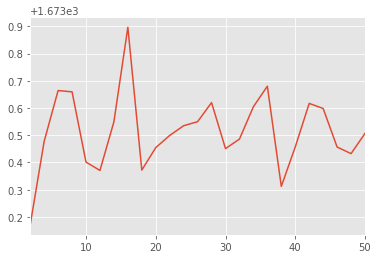

In [32]:
mse_avg = {}
for n_folds in range(2, 51, 2):
    mse_values = []
    scores = []
    n= 0

    scores = []
    #shuffling represents a TRUE random sampling
    kf = cross_validation.KFold(len(modeldata), n_folds=n_folds, shuffle=True)
    for train_index, test_index in kf:
        lm = linear_model.LinearRegression().fit(
            modeldata.iloc[train_index], y.iloc[train_index])
        mse_values.append(metrics.mean_squared_error(
            y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
        scores.append(lm.score(modeldata, y))
        n+=1

        mse_avg[n_folds] = np.mean(mse_values)
    print ('Mean of MSE for {} folds:'.format(n_folds), np.mean(mse_values))

pd.Series(mse_avg).plot();

Mean of MSE for 3 folds: 1817.58711453
Mean of MSE for 7 folds: 1736.12757027
Mean of MSE for 11 folds: 1727.55234543
Mean of MSE for 15 folds: 1729.15209047
Mean of MSE for 19 folds: 1714.26252611
Mean of MSE for 23 folds: 1709.01858956
Mean of MSE for 27 folds: 1706.9394101
Mean of MSE for 31 folds: 1703.95350075
Mean of MSE for 35 folds: 1700.15087471
Mean of MSE for 39 folds: 1696.00994702
Mean of MSE for 43 folds: 1695.44395904
Mean of MSE for 47 folds: 1692.71889465
Mean of MSE for 51 folds: 1692.5067111
Mean of MSE for 55 folds: 1692.50051247
Mean of MSE for 59 folds: 1692.50040832
Mean of MSE for 63 folds: 1690.54323413
Mean of MSE for 67 folds: 1690.46400813
Mean of MSE for 71 folds: 1689.31013224
Mean of MSE for 75 folds: 1689.08229861
Mean of MSE for 79 folds: 1687.29954107
Mean of MSE for 83 folds: 1687.36370519
Mean of MSE for 87 folds: 1686.51853465
Mean of MSE for 91 folds: 1684.99779404
Mean of MSE for 95 folds: 1685.09021533
Mean of MSE for 99 folds: 1687.035436
Mean o

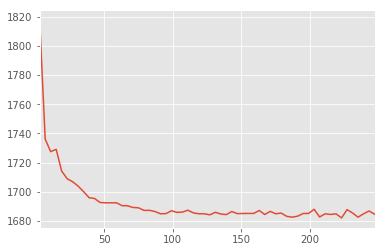

In [23]:
mse_avg = {}
for n_folds in range(3, 250, 4):
    mse_values = []
    scores = []
    n= 0

    scores = []
    kf = cross_validation.KFold(len(modeldata), n_folds=n_folds, shuffle=False)
    for train_index, test_index in kf:
        lm = linear_model.LinearRegression().fit(
            modeldata.iloc[train_index], y.iloc[train_index])
        mse_values.append(metrics.mean_squared_error(
            y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
        scores.append(lm.score(modeldata, y))
        n+=1

        mse_avg[n_folds] = np.mean(mse_values)
    print ('Mean of MSE for {} folds:'.format(n_folds), np.mean(mse_values))

pd.Series(mse_avg).plot();

In [38]:
lm = linear_model.LinearRegression().fit(modeldata, y)
print ("~~~~ Single Model ~~~~")
print ('MSE of single model:', metrics.mean_squared_error(y, lm.predict(modeldata)))
print ()'R2: ', lm.score(modeldata, y)

~~~~ Single Model ~~~~
MSE of single model: 1672.58110765
R2:  0.311934605989


### Check
While the cross validated approach here generated more overall error, which of the two approaches would predict new data more accurately: the single model or the cross validated, averaged one? Why?


Answer: 

### There are ways to improve our model with regularization. 
Let's check out the effects on MSE and R2

In [43]:
lm = linear_model.LinearRegression().fit(modeldata, y)
print ("~~~ OLS ~~~")
print ('OLS MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata)))
print ('OLS R2:', lm.score(modeldata, y))

lm = linear_model.Lasso().fit(modeldata, y)
print ("~~~ Lasso ~~~")
print ('Lasso MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata)))
print ('Lasso R2:', lm.score(modeldata, y))

lm = linear_model.Ridge().fit(modeldata, y)
print ("~~~ Ridge ~~~")
print ('Ridge MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata)))
print ('Ridge R2:', lm.score(modeldata, y))

~~~ OLS ~~~
OLS MSE:  1672.58110765
OLS R2: 0.311934605989
~~~ Lasso ~~~
Lasso MSE:  1725.41581608
Lasso R2: 0.290199495922
~~~ Ridge ~~~
Ridge MSE:  1672.60490113
Ridge R2: 0.311924817843


### Figuring out the alphas can be done by "hand"

In [44]:
alphas = np.logspace(-10, 10, 21)
print (alphas)
for a in alphas:
    print ('Alpha:', a)
    lm = linear_model.Ridge(alpha=a)
    lm.fit(modeldata, y)
    print (lm.coef_)
    print (metrics.mean_squared_error(y, lm.predict(modeldata)))

[  1.00000000e-10   1.00000000e-09   1.00000000e-08   1.00000000e-07
   1.00000000e-06   1.00000000e-05   1.00000000e-04   1.00000000e-03
   1.00000000e-02   1.00000000e-01   1.00000000e+00   1.00000000e+01
   1.00000000e+02   1.00000000e+03   1.00000000e+04   1.00000000e+05
   1.00000000e+06   1.00000000e+07   1.00000000e+08   1.00000000e+09
   1.00000000e+10]
Alpha: 1e-10
[ 112.68901765  -84.01121684  -24.68489063  -21.00314493  -21.71893628]
1672.58110765
Alpha: 1e-09
[ 112.68901765  -84.01121684  -24.68489061  -21.00314491  -21.71893626]
1672.58110765
Alpha: 1e-08
[ 112.68901765  -84.01121684  -24.6848904   -21.00314471  -21.71893606]
1672.58110765
Alpha: 1e-07
[ 112.68901763  -84.01121682  -24.68488837  -21.00314268  -21.71893403]
1672.58110765
Alpha: 1e-06
[ 112.68901745  -84.01121667  -24.68486804  -21.00312237  -21.71891373]
1672.58110765
Alpha: 1e-05
[ 112.68901562  -84.01121509  -24.68466472  -21.00291929  -21.71871079]
1672.58110765
Alpha: 0.0001
[ 112.68899732  -84.01119938

### Or we can use grid search to make this faster

In [45]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-10, 10, 21)
gs = GridSearchCV(
    cv=5,
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas, 'fit_intercept': [True, False]},
    scoring='mean_squared_error')

gs.fit(modeldata, y)

C:\Users\Richard\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Richard\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Richard\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Richard\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in versi

C:\Users\Richard\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Richard\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Richard\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Richard\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in versi

C:\Users\Richard\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Richard\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Richard\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Richard\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in versi

C:\Users\Richard\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Richard\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Richard\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Richard\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in versi

C:\Users\Richard\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Richard\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Richard\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Richard\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in versi

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

##### Best score 

In [46]:
print (gs.best_score_)

-1777.68141688


##### mean squared error here comes in negative, so let's make it positive.

In [47]:
print (-gs.best_score_) 

1777.68141688


##### explains which grid_search setup worked best

In [48]:
print (gs.best_estimator_) 

Ridge(alpha=10.0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


##### shows all the grid pairings and their performances.

In [49]:
from pprint import pprint
pprint(gs.grid_scores_)

[mean: -1780.95367, std: 946.92422, params: {'alpha': 1e-10, 'fit_intercept': True},
 mean: -1781.84322, std: 946.91796, params: {'alpha': 1e-10, 'fit_intercept': False},
 mean: -1780.95367, std: 946.92422, params: {'alpha': 1.0000000000000001e-09, 'fit_intercept': True},
 mean: -1781.84322, std: 946.91796, params: {'alpha': 1.0000000000000001e-09, 'fit_intercept': False},
 mean: -1780.95367, std: 946.92422, params: {'alpha': 1e-08, 'fit_intercept': True},
 mean: -1781.84322, std: 946.91796, params: {'alpha': 1e-08, 'fit_intercept': False},
 mean: -1780.95367, std: 946.92422, params: {'alpha': 9.9999999999999995e-08, 'fit_intercept': True},
 mean: -1781.84322, std: 946.91796, params: {'alpha': 9.9999999999999995e-08, 'fit_intercept': False},
 mean: -1780.95367, std: 946.92423, params: {'alpha': 9.9999999999999995e-07, 'fit_intercept': True},
 mean: -1781.84322, std: 946.91796, params: {'alpha': 9.9999999999999995e-07, 'fit_intercept': False},
 mean: -1780.95367, std: 946.92423, params:

C:\Users\Richard\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


## Gradient Descent

In [50]:
num_to_approach = 6.2
start = 0.
steps = [-1, 1]
optimized = False
a=0
while not optimized:
    print ('iteration', a)
    current_distance = num_to_approach - start
    print ('\tcurrent distance', current_distance)
    got_better = False
    next_steps = [start + i for i in steps]
    for n in next_steps:
        distance = np.abs(num_to_approach - n)
        if distance < current_distance:
            got_better = True
            print ('\tdistance', distance, 'is better than', current_distance)
            current_distance = distance
            start = n
    if got_better:
        print ('\tfound better solution! using', current_distance)
        a += 1
    else:
        optimized = True
        print (start, 'is closest to', num_to_approach)


iteration 0
	current distance 6.2
	distance 5.2 is better than 6.2
	found better solution! using 5.2
iteration 1
	current distance 5.2
	distance 4.2 is better than 5.2
	found better solution! using 4.2
iteration 2
	current distance 4.2
	distance 3.2 is better than 4.2
	found better solution! using 3.2
iteration 3
	current distance 3.2
	distance 2.2 is better than 3.2
	found better solution! using 2.2
iteration 4
	current distance 2.2
	distance 1.2 is better than 2.2
	found better solution! using 1.2
iteration 5
	current distance 1.2000000000000002
	distance 0.2 is better than 1.2000000000000002
	found better solution! using 0.2
iteration 6
	current distance 0.20000000000000018
6.0 is closest to 6.2


###Bonus: 
implement a stopping point, similar to what n_iter would do in gradient descent when we've reached "good enough"

## Demo: Application of Gradient Descent 

In [51]:
lm = linear_model.SGDRegressor()
lm.fit(modeldata, y)
print ("Gradient Descent R2:", lm.score(modeldata, y))
print ("Gradient Descent MSE:", metrics.mean_squared_error(y, lm.predict(modeldata)))

Gradient Descent R2: 0.307320862538
Gradient Descent MSE: 1683.79640812


### Check: Untuned, how well did gradient descent perform compared to OLS?

Answer: 

# Independent Practice: Bike data revisited

There are tons of ways to approach a regression problem. The regularization techniques appended to ordinary least squares optimizes the size of coefficients to best account for error. Gradient Descent also introduces learning rate (how aggressively do we solve the problem), epsilon (at what point do we say the error margin is acceptable), and iterations (when should we stop no matter what?)

For this deliverable, our goals are to:

- implement the gradient descent approach to our bike-share modeling problem,
- show how gradient descent solves and optimizes the solution,
- demonstrate the grid_search module!

While exploring the Gradient Descent regressor object, you'll build a grid search using the stochastic gradient descent estimator for the bike-share data set. Continue with either the model you evaluated last class or the simpler one from today. In particular, be sure to implement the "param_grid" in the grid search to get answers for the following questions:

- With a set of alpha values between 10^-10 and 10^-1, how does the mean squared error change?
- Based on the data, we know when to properly use l1 vs l2 regularization. By using a grid search with l1_ratios between 0 and 1 (increasing every 0.05), does that statement hold true? If not, did gradient descent have enough iterations?
- How do these results change when you alter the learning rate (eta0)?

**Bonus**: Can you see the advantages and disadvantages of using gradient descent after finishing this exercise?

### Starter Code

In [ ]:
linear_model.SGDRegressor?

In [34]:
alphas = np.logspace(-10, 10, 21)
params = {'alpha': alphas, 
          'learning_rate': ['constant', 'optimal', 'invscaling']} # put your gradient descent parameters here
gs = GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='neg_mean_squared_error',
    )

gs.fit(modeldata, y)

print 'BEST ESTIMATOR'
print -gs.best_score_
print gs.best_estimator_
print 'ALL ESTIMATORS'
print gs.grid_scores_

BEST ESTIMATOR
1677.94773392
SGDRegressor(alpha=1e-08, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)
ALL ESTIMATORS
[mean: -1686.91037, std: 80.51053, params: {'alpha': 1e-10, 'learning_rate': 'constant'}, mean: -166807447815127865477413470208.00000, std: 154785414170386603022477164544.00000, params: {'alpha': 1e-10, 'learning_rate': 'optimal'}, mean: -1690.79966, std: 87.95230, params: {'alpha': 1e-10, 'learning_rate': 'invscaling'}, mean: -1699.40427, std: 92.12855, params: {'alpha': 1.0000000000000001e-09, 'learning_rate': 'constant'}, mean: -86294590148466303703011295232.00000, std: 81190245262643832372647165952.00000, params: {'alpha': 1.0000000000000001e-09, 'learning_rate': 'optimal'}, mean: -1690.19427, std: 84.97742, params: {'alpha': 1.0000000000000001e-09, 'learning_rate': 'invscali

/Users/Stefan/.virtualenvs/ga_dat/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [ ]:
## go for it!